In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from utils import M5Data

## Data exploration

M5 Forecasting - Accuracy

In [32]:
data_root = "../data/M5-forecasting-accuracy" # Root dir of the M5 dataset

calendar = pd.read_csv(os.path.join(data_root, "calendar.csv"))
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [13]:
test = pd.read_csv(os.path.join(data_root, "sales_train_evaluation.csv"))
test.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [55]:
train = pd.read_csv(os.path.join(data_root, "sales_train_validation.csv"))
train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


d_331     13
d_697     11
d_1062    20
d_1427    20
d_1792    14
dtype: int64

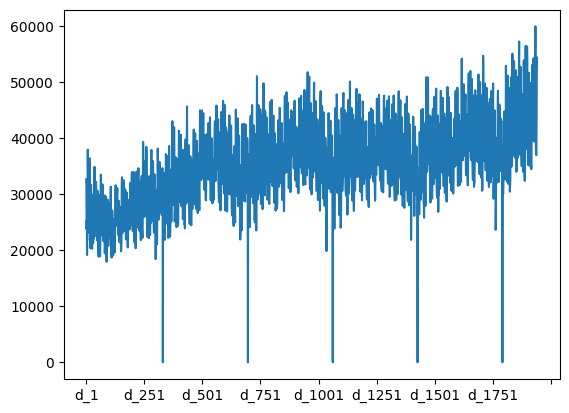

In [40]:
# Ventas totales por día
start_pos = train.columns.get_loc('d_1')

total_sales = train.iloc[:, start_pos:].sum()
total_sales.plot()
total_sales[total_sales < 1000]

In [35]:
calendar[calendar['d'] == "d_697"]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
696,2012-12-25,11248,Tuesday,4,12,2012,d_697,Christmas,National,NaN,NaN,0,0,0


<Axes: >

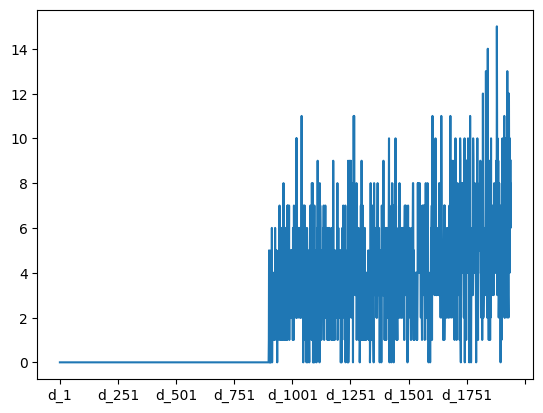

In [46]:
train[train['item_id'] == "HOBBIES_1_001"].iloc[:, start_pos:].sum().plot()

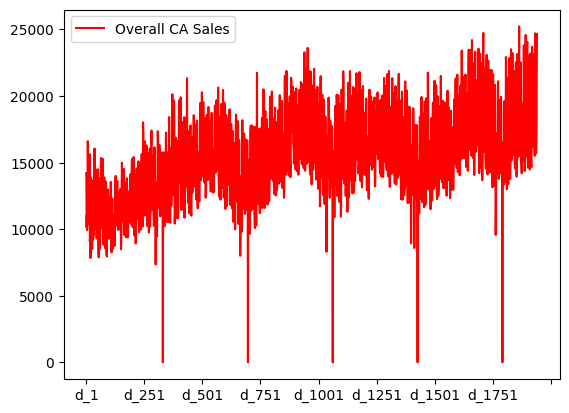

In [54]:
train[train['state_id'] == "CA"].iloc[:, start_pos:].sum().plot(color="red", label = "Overall CA Sales")
#sales[sales['state_id'] == "TX"].iloc[:, start_pos:].sum().plot(color="blue", label = "Overall TX Sales")
#sales[sales['state_id'] == "WI"].iloc[:, start_pos:].sum().plot(color="green", label = "Overall WI Sales")
plt.legend()

# Data

In [2]:
data_root = "../data/m5-forecasting-accuracy" # Root dir of the M5 dataset
calendar_path = os.path.join(data_root, "calendar.csv")
sales_train_validation_path = os.path.join(data_root, "sales_train_validation.csv")
sales_train_evaluation_path = os.path.join(data_root, "sales_train_evaluation.csv")

In [3]:
m5data = M5Data(calendar_path=calendar_path, 
                sales_train_validation_path=sales_train_validation_path,
                sales_train_evaluation_path=sales_train_evaluation_path)


2013-07-18 00:00:00
2013-07-18 00:00:00
2013-07-18 00:00:00


/tmp/ipykernel_612/2736888413.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(dates[0])
/tmp/ipykernel_612/2736888413.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(dates[0])
/tmp/ipykernel_612/2736888413.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(dates[0])


<Figure size 640x480 with 0 Axes>

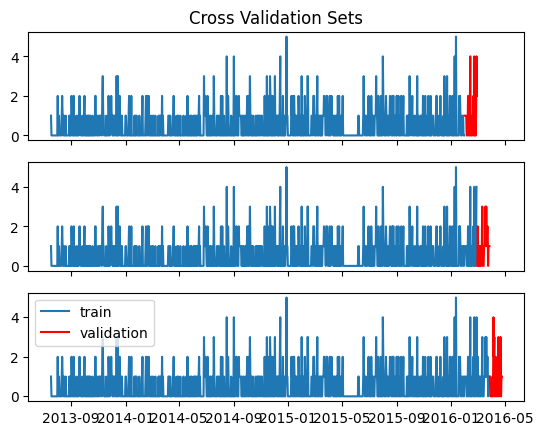

In [21]:
train_sets, cv_sets = m5data.get_train_val_ts(ts_id="HOBBIES_1_001_CA_1", n_days=28, dynamic_start_pos=True)
n_splits = len(train_sets)

plt.tight_layout()
f, axs = plt.subplots(n_splits, 1, sharex=True)
axs[0].set_title("Cross Validation Sets")
for i in range(n_splits):
    train_ts= train_sets[i]
    cv_ts   = cv_sets[i]

    n_days = len(cv_ts.columns)
    dates   = m5data.get_dates(pd.concat([train_ts, cv_ts]), real=True)
    
    axs[i].plot(dates[:-n_days], train_ts.iloc[0], label="train")
    axs[i].plot(dates[-n_days:], cv_ts.iloc[0], color="red", label="validation")
plt.legend()

In [5]:
m5data.sales_train[m5data.sales_train['item_id'] == "FOODS_3_823"]

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
3044,FOODS_3_823_CA_1_validation,FOODS_3_823,FOODS_3,FOODS,CA_1,CA,0,0,0,0,...,4,0,2,1,0,2,0,4,1,1
6093,FOODS_3_823_CA_2_validation,FOODS_3_823,FOODS_3,FOODS,CA_2,CA,0,0,0,0,...,4,2,1,3,1,3,0,2,2,3
9142,FOODS_3_823_CA_3_validation,FOODS_3_823,FOODS_3,FOODS,CA_3,CA,10,5,4,5,...,2,2,2,3,3,2,3,4,1,0
12191,FOODS_3_823_CA_4_validation,FOODS_3_823,FOODS_3,FOODS,CA_4,CA,1,1,1,4,...,3,1,2,2,0,1,1,3,3,0
15240,FOODS_3_823_TX_1_validation,FOODS_3_823,FOODS_3,FOODS,TX_1,TX,2,2,2,2,...,0,1,0,0,0,0,0,0,1,0
18289,FOODS_3_823_TX_2_validation,FOODS_3_823,FOODS_3,FOODS,TX_2,TX,2,1,0,1,...,0,0,0,0,1,0,0,0,1,0
21338,FOODS_3_823_TX_3_validation,FOODS_3_823,FOODS_3,FOODS,TX_3,TX,0,0,0,0,...,1,1,0,1,0,0,0,2,0,2
24387,FOODS_3_823_WI_1_validation,FOODS_3_823,FOODS_3,FOODS,WI_1,WI,0,0,0,0,...,0,1,2,1,0,0,0,2,0,0
27436,FOODS_3_823_WI_2_validation,FOODS_3_823,FOODS_3,FOODS,WI_2,WI,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1


In [16]:
m5data.sales_train['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

# DeepAR

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

# Load data from a CSV file into a PandasDataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/AileenNielsen/"
    "TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv",
    index_col=0,
    parse_dates=True,
)
dataset = PandasDataset(df, target="#Passengers")

# Split the data for training and testing
training_data, test_gen = split(dataset, offset=-36)
test_data = test_gen.generate_instances(prediction_length=12, windows=3)

/workspaces/KISA_ITSDA/.venv/lib/python3.12/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(
/workspaces/KISA_ITSDA/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/workspaces/KISA_ITSDA/.venv/lib/python3.12/site-packages/gluonts/time_feature/_base.py:249: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = to_offset(freq_str)
/workspaces/KISA_ITSDA/.venv/lib/python3.12/site-packages/gluonts/time_feature/lag.py:104: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = to_offset(freq_str)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/workspaces/KISA_ITSDA/.venv/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are

Epoch 0: |          | 50/? [00:07<00:00,  6.42it/s, v_num=0, train_loss=5.800]

Epoch 0, global step 50: 'train_loss' reached 5.80399 (best 5.80399), saving model to '/workspaces/KISA_ITSDA/TSF/lightning_logs/version_0/checkpoints/epoch=0-step=50.ckpt' as top 1


Epoch 1: |          | 50/? [00:02<00:00, 18.56it/s, v_num=0, train_loss=4.750]

Epoch 1, global step 100: 'train_loss' reached 4.74734 (best 4.74734), saving model to '/workspaces/KISA_ITSDA/TSF/lightning_logs/version_0/checkpoints/epoch=1-step=100.ckpt' as top 1


Epoch 2: |          | 50/? [00:02<00:00, 17.87it/s, v_num=0, train_loss=4.520]

Epoch 2, global step 150: 'train_loss' reached 4.51537 (best 4.51537), saving model to '/workspaces/KISA_ITSDA/TSF/lightning_logs/version_0/checkpoints/epoch=2-step=150.ckpt' as top 1


Epoch 3: |          | 50/? [00:02<00:00, 18.43it/s, v_num=0, train_loss=4.370]

Epoch 3, global step 200: 'train_loss' reached 4.36709 (best 4.36709), saving model to '/workspaces/KISA_ITSDA/TSF/lightning_logs/version_0/checkpoints/epoch=3-step=200.ckpt' as top 1


Epoch 4: |          | 50/? [00:02<00:00, 18.93it/s, v_num=0, train_loss=4.270]

Epoch 4, global step 250: 'train_loss' reached 4.26583 (best 4.26583), saving model to '/workspaces/KISA_ITSDA/TSF/lightning_logs/version_0/checkpoints/epoch=4-step=250.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: |          | 50/? [00:02<00:00, 18.43it/s, v_num=0, train_loss=4.270]


/workspaces/KISA_ITSDA/.venv/lib/python3.12/site-packages/gluonts/time_feature/lag.py:104: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = to_offset(freq_str)


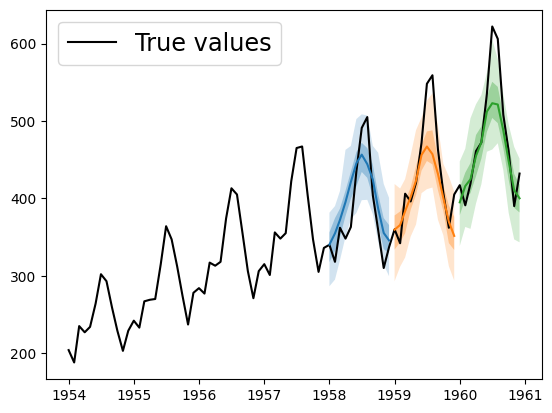

In [2]:
# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=12, freq="M", trainer_kwargs={"max_epochs": 5}
).train(training_data)

forecasts = list(model.predict(test_data.input))

# Plot predictions
plt.plot(df["1954":], color="black")
for forecast in forecasts:
  forecast.plot()
plt.legend(["True values"], loc="upper left", fontsize="xx-large")
plt.show()